In [4]:
import sys
# setting path
sys.path.append('..')

In [8]:
import numpy as np

from src import io, var, utils, fourier, lin_reg, reconstruction

import importlib
importlib.reload(io)
importlib.reload(var)
importlib.reload(utils)
importlib.reload(fourier)
importlib.reload(lin_reg)
importlib.reload(reconstruction)

<module 'src.reconstruction' from '/home/ray/git-projects/spec_appx/notebooks/../src/reconstruction.py'>

In [13]:
grid = var.grid()
topo = var.topo()
cell = var.topo_cell()
    
reader = io.ncdata()
fn = '../data/icon_grid_0012_R02B04_G_linked.nc'
reader.read_dat(fn, grid)
grid.apply_f(utils.rad2deg)

fn = '../data/GMTED2010_topoGlobal_SGS_30ArcSec.nc'
reader.read_dat(fn, topo)

lat_ref = 43
lon_ref = 42
vid = utils.pick_cell(lat_ref, lon_ref, grid)

writer.read_topo(topo, cell, grid.clon_vertices[vid,:], grid.clat_vertices[vid,:])
del topo

In [54]:
cell.gen_mgrids()

triangle = utils.triangle(grid.clon_vertices[vid,:], grid.clat_vertices[vid,:])
cell.get_masked(triangle)

In [60]:
nhi = 12
nhj = 12

fobj = fourier.f_trans(nhi,nhj)
fobj.do_full(cell)
a_m, data_recons = lin_reg.do(fobj, cell, lmbda = 1e-6)

fobj.get_freq_grid(a_m)
dat_2D = reconstruction.recon_2D(data_recons, cell)


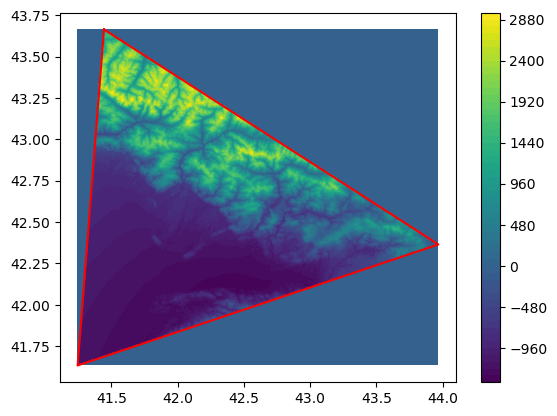

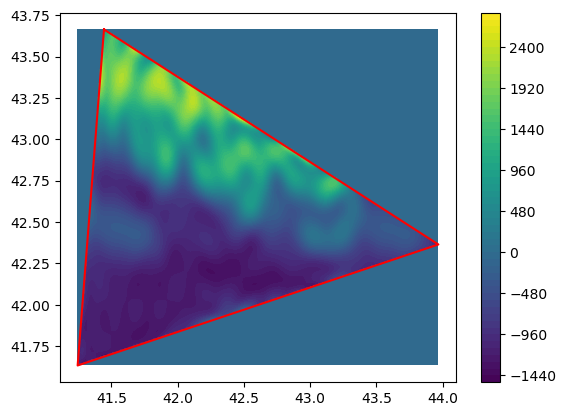

In [61]:
import matplotlib.pyplot as plt
plt.contourf(cell.lon,cell.lat,cell.topo*cell.mask,60)
x = np.append(grid.clon_vertices[vid,:],grid.clon_vertices[vid,0])
y = np.append(grid.clat_vertices[vid,:],grid.clat_vertices[vid,0])
plt.plot(x,y,'-r')
plt.colorbar()
plt.show()

plt.contourf(cell.lon,cell.lat,dat_2D,60)
x = np.append(grid.clon_vertices[vid,:],grid.clon_vertices[vid,0])
y = np.append(grid.clat_vertices[vid,:],grid.clat_vertices[vid,0])
plt.plot(x,y,'-r')
plt.colorbar()
plt.show()